Copyright (c) <2022>, <Regina Nockerts>
All rights reserved.

This source code is licensed under the BSD-style license found in the
LICENSE file in the root directory of this source tree. 


In [9]:
import pandas as pd
import numpy as np
from nlpUtils import aardvark as aa 
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix, classification_report
from sklearn.metrics import f1_score # auc if I get embeddings
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
# sns.set(font_scale=1.5)



In [10]:
import importlib
importlib.reload(aa)

<module 'nlpUtils.aardvark' from 'c:\\Users\\rnocker\\Desktop\\python\\thesisAgain\\nlpUtils\\aardvark.py'>

# Create Baseline
I am using the majority class prediction as the baseline for this model. From labeling, cleaning, and balancing, we know that negative is the majority class: Majority class = negative = 0

IN ADDITION: remember that our evaluation metric will be __F1 and AUC__. Create a confusion matrix.

In [11]:
# Import the test dataset
x_test = pd.read_csv("dataBalancedSets/x_test.csv", header=0, index_col=0)
y_test = pd.read_csv("dataBalancedSets/y_test_sent.csv", header=0, index_col=0)

In [12]:
# Get the groundtruth - For all of them...
true = list(y_test["y_sent"])
print(len(true))

# Make a list of 1s as long as the training set to function as our base prediction.
maj_pred = [0 for i in range(len(true))]
print(len(maj_pred))

182
182


In [13]:
aa.print_model_metrics (model_name="Majority Prediction", y_true=true, y_pred=maj_pred, labels=[0,1,2])

Majority Prediction prediction F-score, macro average: 0.251

              precision    recall  f1-score   support

           0       0.60      1.00      0.75       110
           1       0.00      0.00      0.00        38
           2       0.00      0.00      0.00        34

    accuracy                           0.60       182
   macro avg       0.20      0.33      0.25       182
weighted avg       0.37      0.60      0.46       182



Confusion matrix:
 [[110   0   0]
 [ 38   0   0]
 [ 34   0   0]]

Per-Class Confusion matrix:
 [[[  0  72]
  [  0 110]]

 [[144   0]
  [ 38   0]]

 [[148   0]
  [ 34   0]]]


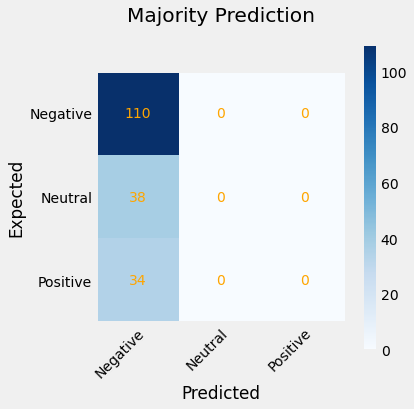

In [14]:
aa.print_conf_matrix (model_name="Majority Prediction", y_true=true, y_pred=maj_pred)